In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('C:\CDAC\ML\Topic 8\mountains_vs_beaches_preferences.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


# Label Encoding

In [78]:
#df.drop('Preferred_Activities',axis=1,inplace=True)

In [79]:
df['Education_Level'].unique()

array(['bachelor', 'master', 'high school', 'doctorate'], dtype=object)

In [80]:
label_map = {'Education_Level':{'bachelor':1, 'master':2, 'high school':0, 'doctorate':3}}

In [81]:
df.replace(label_map,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17612\1715271054.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(label_map,inplace=True)


In [82]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,1,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,2,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,2,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,0,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,0,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,2,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,1,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,3,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,3,9,swimming,4620,suburban,173,10,summer,0,1,0


In [83]:
df_ohe=pd.get_dummies(df)

In [84]:
df_ohe.shape

(52444, 24)

In [85]:
X=df_ohe.drop('Preference',axis=1)
Y=df_ohe['Preference']

In [86]:
X_sc=(X-X.mean())/X.std()

In [87]:
X_sc.mean()

Age                                7.654959e-18
Income                            -4.322003e-17
Education_Level                    1.089307e-16
Travel_Frequency                  -1.471378e-16
Vacation_Budget                    7.153660e-17
Proximity_to_Mountains            -9.185950e-17
Proximity_to_Beaches               2.526814e-17
Pets                              -1.463249e-17
Environmental_Concerns            -7.858188e-18
Gender_female                     -2.013661e-17
Gender_male                       -4.416843e-17
Gender_non-binary                  5.995255e-17
Preferred_Activities_hiking        2.113581e-17
Preferred_Activities_skiing        4.606524e-18
Preferred_Activities_sunbathing    3.251664e-18
Preferred_Activities_swimming      1.097437e-16
Location_rural                    -1.083888e-18
Location_suburban                  7.018174e-17
Location_urban                    -4.525232e-17
Favorite_Season_fall               8.318840e-17
Favorite_Season_spring            -4.416

In [88]:
#pip install imblearn

In [89]:
# Original data train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_sc,Y,test_size=0.3,stratify=Y)

In [90]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((36710, 23), (15734, 23), (36710,), (15734,))

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
sm=SMOTE(random_state=7)

In [93]:
X_sm,Y_sm = sm.fit_resample(X_sc,Y)
X_sm.shape,Y_sm.shape

((78592, 23), (78592,))

In [94]:
Y_sm.value_counts(normalize=True)

Preference
1    0.5
0    0.5
Name: proportion, dtype: float64

In [95]:
X_sm_train,X_sm_test,Y_sm_train,Y_sm_test=train_test_split(X_sm,Y_sm,test_size=0.3,random_state=7,stratify=Y_sm)
X_sm_train.shape,X_sm_test.shape,Y_sm_train.shape,Y_sm_test.shape

((55014, 23), (23578, 23), (55014,), (23578,))

# 3 Data balanced with SMOTENC

In [96]:
from imblearn.over_sampling import SMOTENC

In [97]:
cat_features = ['Education_Level','Gender_female',
       'Gender_male', 'Gender_non-binary', 'Preferred_Activities_hiking',
       'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
       'Preferred_Activities_swimming', 'Location_rural', 'Location_suburban',
       'Location_urban', 'Favorite_Season_fall', 'Favorite_Season_spring',
       'Favorite_Season_summer', 'Favorite_Season_winter']
smnc=SMOTENC(cat_features,random_state=7)

In [98]:
df_ohe.columns

Index(['Age', 'Income', 'Education_Level', 'Travel_Frequency',
       'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches',
       'Pets', 'Environmental_Concerns', 'Preference', 'Gender_female',
       'Gender_male', 'Gender_non-binary', 'Preferred_Activities_hiking',
       'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
       'Preferred_Activities_swimming', 'Location_rural', 'Location_suburban',
       'Location_urban', 'Favorite_Season_fall', 'Favorite_Season_spring',
       'Favorite_Season_summer', 'Favorite_Season_winter'],
      dtype='object')

In [99]:
X_smnc,Y_smnc=smnc.fit_resample(X_sc,Y)

In [100]:
X_smnc.shape,Y_smnc.shape

((78592, 23), (78592,))

In [101]:
Y_smnc.value_counts(normalize=True)

Preference
1    0.5
0    0.5
Name: proportion, dtype: float64

In [102]:
X_smnc_train,X_smnc_test,Y_smnc_train,Y_smnc_test=train_test_split(X_sc,Y,test_size=0.3,stratify=Y)

# 4 Data Balanced with SMOTE Tomek

In [103]:
from imblearn.combine import SMOTETomek

In [104]:
smt=SMOTETomek(random_state=True)

In [105]:
X_smt,Y_smt=smt.fit_resample(X_sc,Y)
X_smt.shape,Y_smt.shape

((78262, 23), (78262,))

In [106]:
Y_smt.value_counts(normalize=True)

Preference
1    0.5
0    0.5
Name: proportion, dtype: float64

In [107]:
X_smt_train,X_smt_test,Y_smt_train,Y_smnc_test=train_test_split(X_smt,Y_smt,test_size=0.3,stratify=Y_smt)

In [108]:
X_smt_train.shape,X_smt_test.shape,Y_smt_train.shape,Y_smnc_test.shape

((54783, 23), (23479, 23), (54783,), (23479,))

# 5 Data with undersampling

In [109]:
Y.value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

In [110]:
X_un_0 = X_sc.loc[Y==0,:].sample(Y[Y==1].count())
Y_un_0 = Y[X_un_0.index]
X_un_1 = X.loc[Y==1,:]
Y_un_1 = Y[X_un_1.index]

In [111]:
X_un = pd.concat([X_un_0,X_un_1])
Y_un = pd.concat([Y_un_0,Y_un_1])
X_un.shape,Y_un.shape

((26296, 23), (26296,))

In [112]:
X_un_train,X_un_test,Y_un_train,Y_un_test=train_test_split(X_un,Y_un,test_size=0.3,random_state=7,stratify=Y_un)
X_un_train.shape,X_un_test.shape,Y_un_train.shape,Y_un_test.shape

((18407, 23), (7889, 23), (18407,), (7889,))

# Apply Machine Learning Models

- Logistic Regression
- Random Forest
- Catboost
- LightGBM

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [114]:
lr=LogisticRegression(random_state=7)

In [115]:
lr.fit(X_sm_train,Y_sm_train)


LogisticRegression(random_state=7)

In [116]:
Y_pred=lr.predict(X_sm_test)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(Y_sm_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11789
           1       1.00      1.00      1.00     11789

    accuracy                           1.00     23578
   macro avg       1.00      1.00      1.00     23578
weighted avg       1.00      1.00      1.00     23578



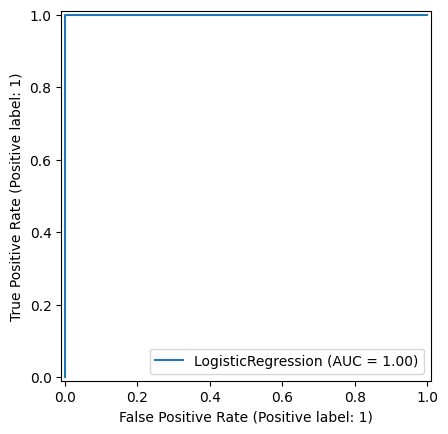

In [120]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr,X_test,Y_test)

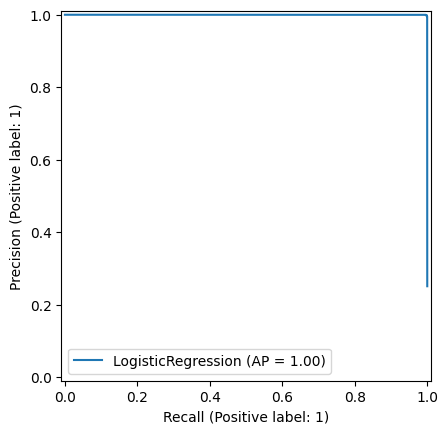

In [121]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(lr, X_test, Y_test)

# Fine Tuning 

-Various Parameters
-We need to find the combination of multiple parameters

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
param_grid={'n_estimators':[100,200,300],'max_depth':[4,5,6],'max_samples':[0.8],'max_features':['sqrt','log',20]}


In [129]:
rf = RandomForestClassifier(oob_score=True,class_weight='balanced',random_state=7)

In [130]:
gscv=GridSearchCV(rf,param_grid = param_grid,scoring='average_precision',cv=2,verbose=2)


In [131]:
gscv.fit(X_sm_train,Y_sm_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=100; total time=   3.2s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=100; total time=   3.1s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=200; total time=   6.5s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=200; total time=   6.3s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=300; total time=   9.6s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=300; total time=   9.4s
[CV] END max_depth=4, max_features=log, max_samples=0.8, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=log, max_samples=0.8, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=log, max_samples=0.8, n_estimators=200; total time=   0.0s
[CV] END max_depth=4, max_features=log, max_samples=0.8, n_estimators=200; total time= 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True, random_state=7),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log', 20],
                         'max_samples': [0.8],
                         'n_estimators': [100, 200, 300]},
             scoring='average_precision', verbose=2)

In [133]:
results=pd.DataFrame(gscv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,3.026778,0.043846,0.217424,0.003270,4,sqrt,0.8,100,"{'max_depth': 4, 'max_features': 'sqrt', 'max_...",0.991783,0.990731,0.991257,5.258885e-04,14
1,6.078457,0.100549,0.391054,0.012596,4,sqrt,0.8,200,"{'max_depth': 4, 'max_features': 'sqrt', 'max_...",0.991153,0.990376,0.990765,3.885093e-04,15
2,9.028334,0.053562,0.578704,0.005420,4,sqrt,0.8,300,"{'max_depth': 4, 'max_features': 'sqrt', 'max_...",0.991887,0.991420,0.991653,2.337289e-04,13
3,0.017806,0.001288,0.000000,0.000000,4,log,0.8,100,"{'max_depth': 4, 'max_features': 'log', 'max_s...",NaN,NaN,NaN,NaN,19
4,0.014265,0.001742,0.000000,0.000000,4,log,0.8,200,"{'max_depth': 4, 'max_features': 'log', 'max_s...",NaN,NaN,NaN,NaN,19
5,0.015008,0.000018,0.000000,0.000000,4,log,0.8,300,"{'max_depth': 4, 'max_features': 'log', 'max_s...",NaN,NaN,NaN,NaN,19
6,10.032472,0.156716,0.172601,0.004862,4,20,0.8,100,"{'max_depth': 4, 'max_features': 20, 'max_samp...",0.990148,0.987441,0.988794,1.353894e-03,18
7,19.661433,0.337989,0.363781,0.020260,4,20,0.8,200,"{'max_depth': 4, 'max_features': 20, 'max_samp...",0.990027,0.987751,0.988889,1.137780e-03,17
8,29.508010,0.354277,0.500343,0.002224,4,20,0.8,300,"{'max_depth': 4, 'max_features': 20, 'max_samp...",0.990027,0.988140,0.989084,9.434875e-04,16
9,3.522887,0.052287,0.220631,0.006307,5,sqrt,0.8,100,"{'max_depth': 5, 'max_features': 'sqrt', 'max_...",0.993698,0.993995,0.993847,1.483590e-04,10


In [134]:
param_grid={'n_estimators':[100,200,300],'max_depth':[4,5,6],'max_samples':[0.8],'max_features':['sqrt',20]}
# Remove log because it gave nan values 

In [135]:
gscv=GridSearchCV(rf,param_grid = param_grid,scoring='f1',cv=2,verbose=2) #scoring f1
gscv.fit(X_sm_train,Y_sm_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=100; total time=   3.3s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=100; total time=   3.1s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=200; total time=   6.2s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=200; total time=   6.3s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=300; total time=   9.6s
[CV] END max_depth=4, max_features=sqrt, max_samples=0.8, n_estimators=300; total time=   9.4s
[CV] END max_depth=4, max_features=20, max_samples=0.8, n_estimators=100; total time=   9.8s
[CV] END max_depth=4, max_features=20, max_samples=0.8, n_estimators=100; total time=  10.2s
[CV] END max_depth=4, max_features=20, max_samples=0.8, n_estimators=200; total time=  19.8s
[CV] END max_depth=4, max_features=20, max_samples=0.8, n_estimators=200; total time=  20.

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True, random_state=7),
             param_grid={'max_depth': [4, 5, 6], 'max_features': ['sqrt', 20],
                         'max_samples': [0.8],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [ ]:
gscv.best_estimator_   # best model object ,can be used for predictions
gscv.best_params_     # best parameters for the given model